In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv('D:\Study\sem 6\PA\Project\Maternal Health Risk Data Set.csv')
print(df.head())


   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None


In [4]:
print("Dataset size :",df.shape)

Dataset size : (1014, 7)


In [5]:
print(df['RiskLevel'].value_counts())

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64


In [6]:
print(df.tail())

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk


In [7]:
print(df.describe().T)

              count        mean        std   min    25%    50%    75%    max
Age          1014.0   29.871795  13.474386  10.0   19.0   26.0   39.0   70.0
SystolicBP   1014.0  113.198225  18.403913  70.0  100.0  120.0  120.0  160.0
DiastolicBP  1014.0   76.460552  13.885796  49.0   65.0   80.0   90.0  100.0
BS           1014.0    8.725986   3.293532   6.0    6.9    7.5    8.0   19.0
BodyTemp     1014.0   98.665089   1.371384  98.0   98.0   98.0   98.0  103.0
HeartRate    1014.0   74.301775   8.088702   7.0   70.0   76.0   80.0   90.0


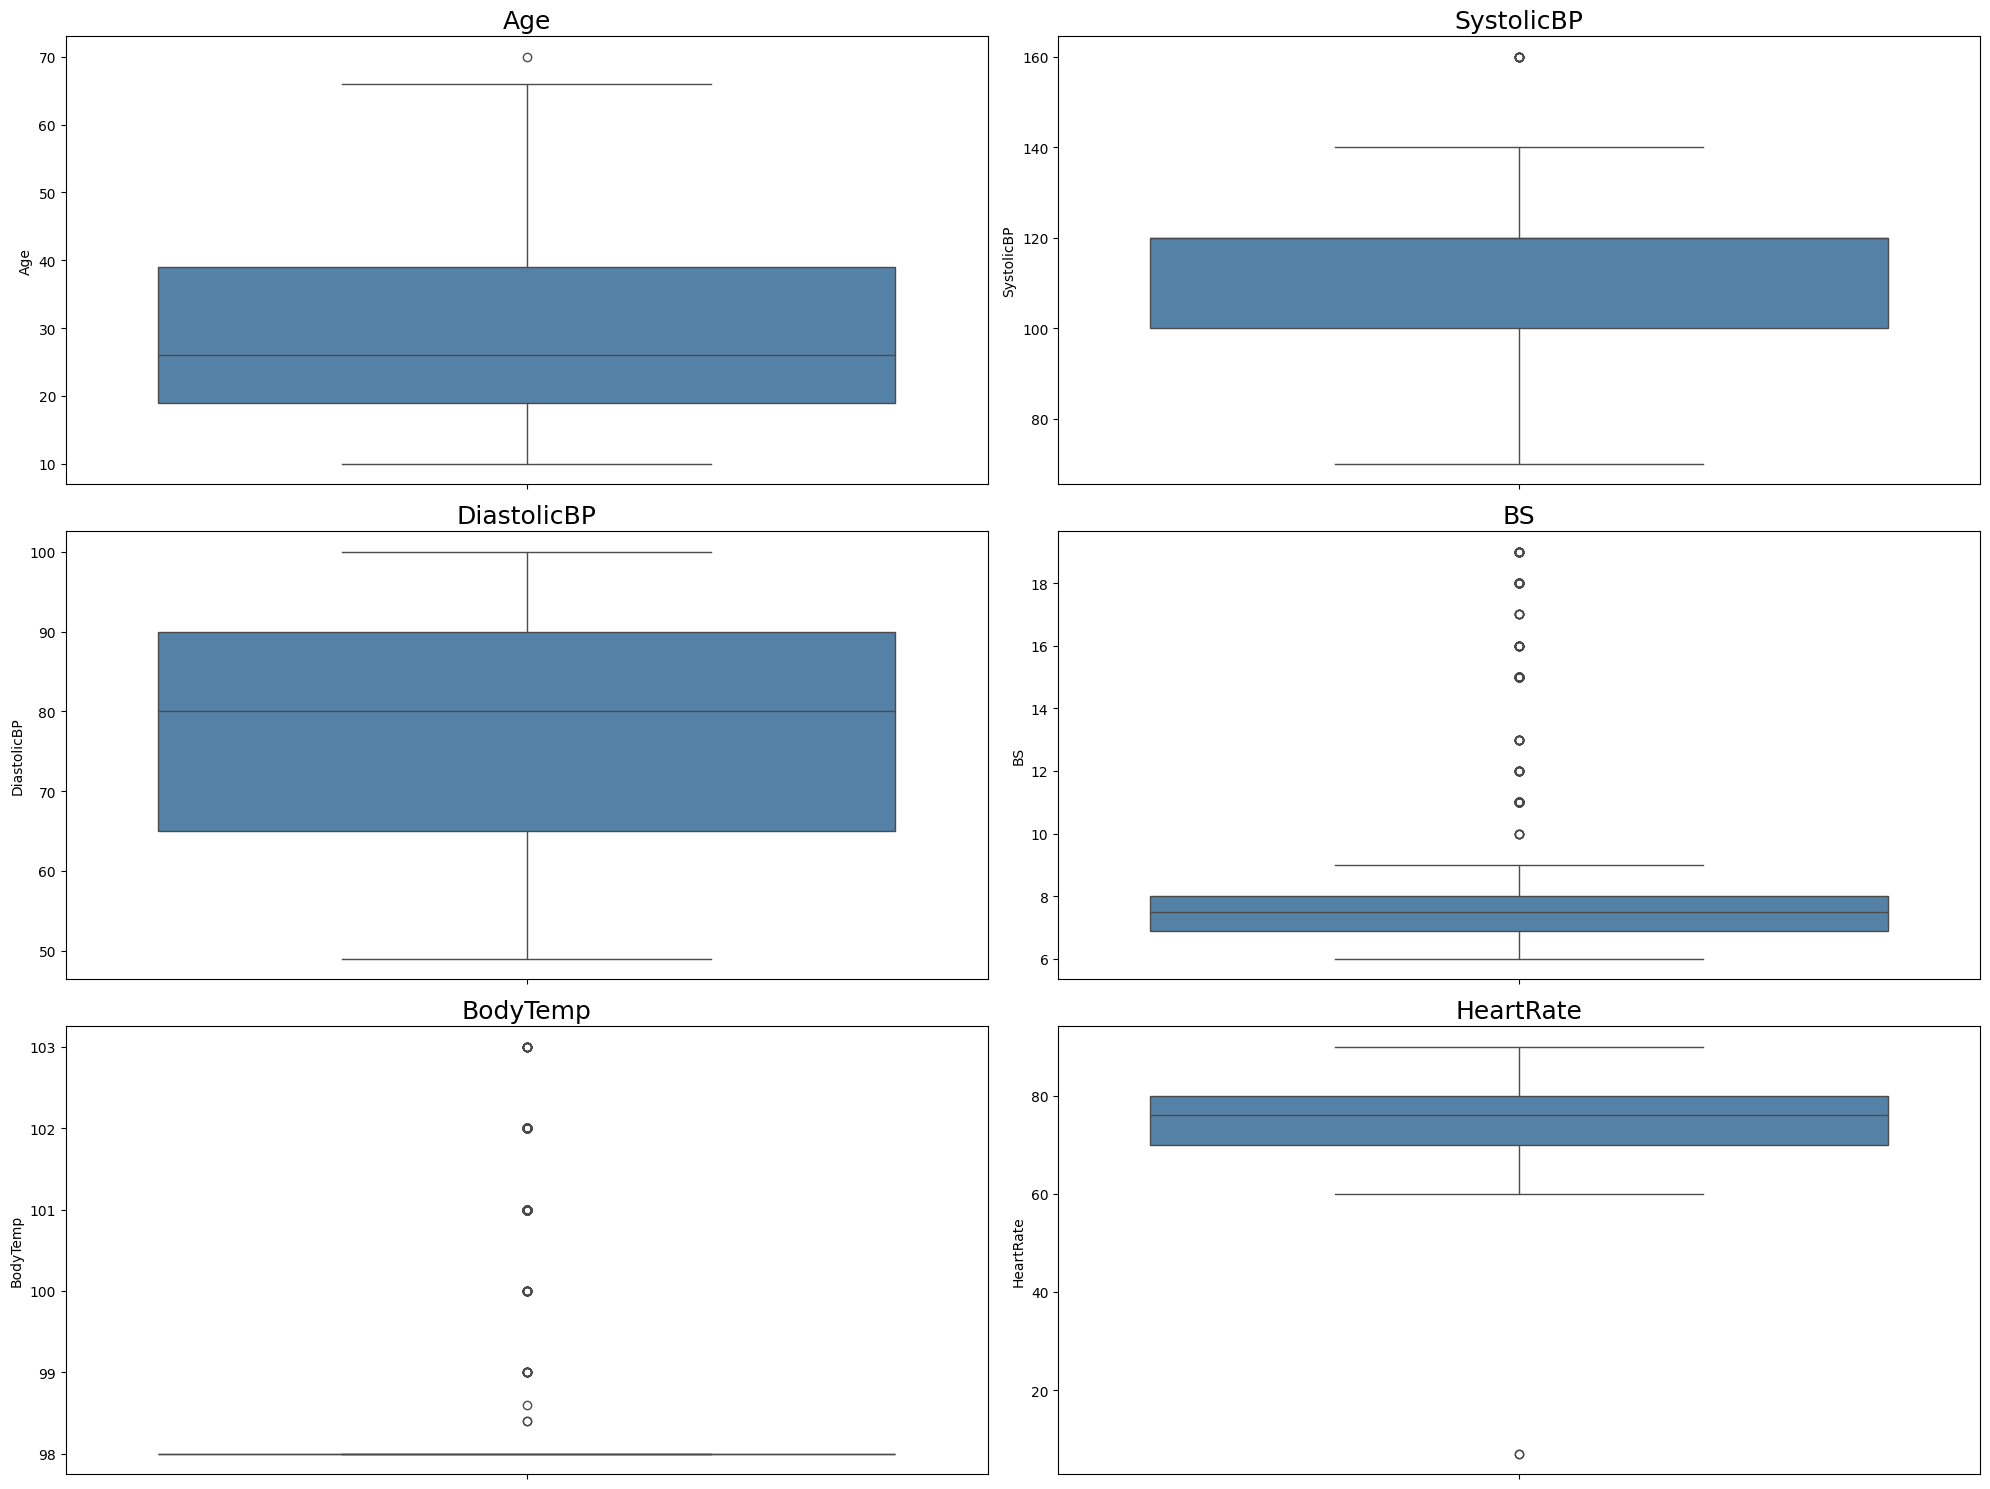

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

for ax, column in zip(axes.flatten(), df.columns):
    sns.boxplot(y=df[column], 
                color="#4682B4", 
                ax=ax)
    ax.set_title(f"{column}", fontsize=18)

plt.tight_layout()
plt.show()

In [9]:
risk_mapping = {"low risk": 0, "mid risk": 1, "high risk": 2}
df["RiskLevel"] = df["RiskLevel"].map(risk_mapping)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


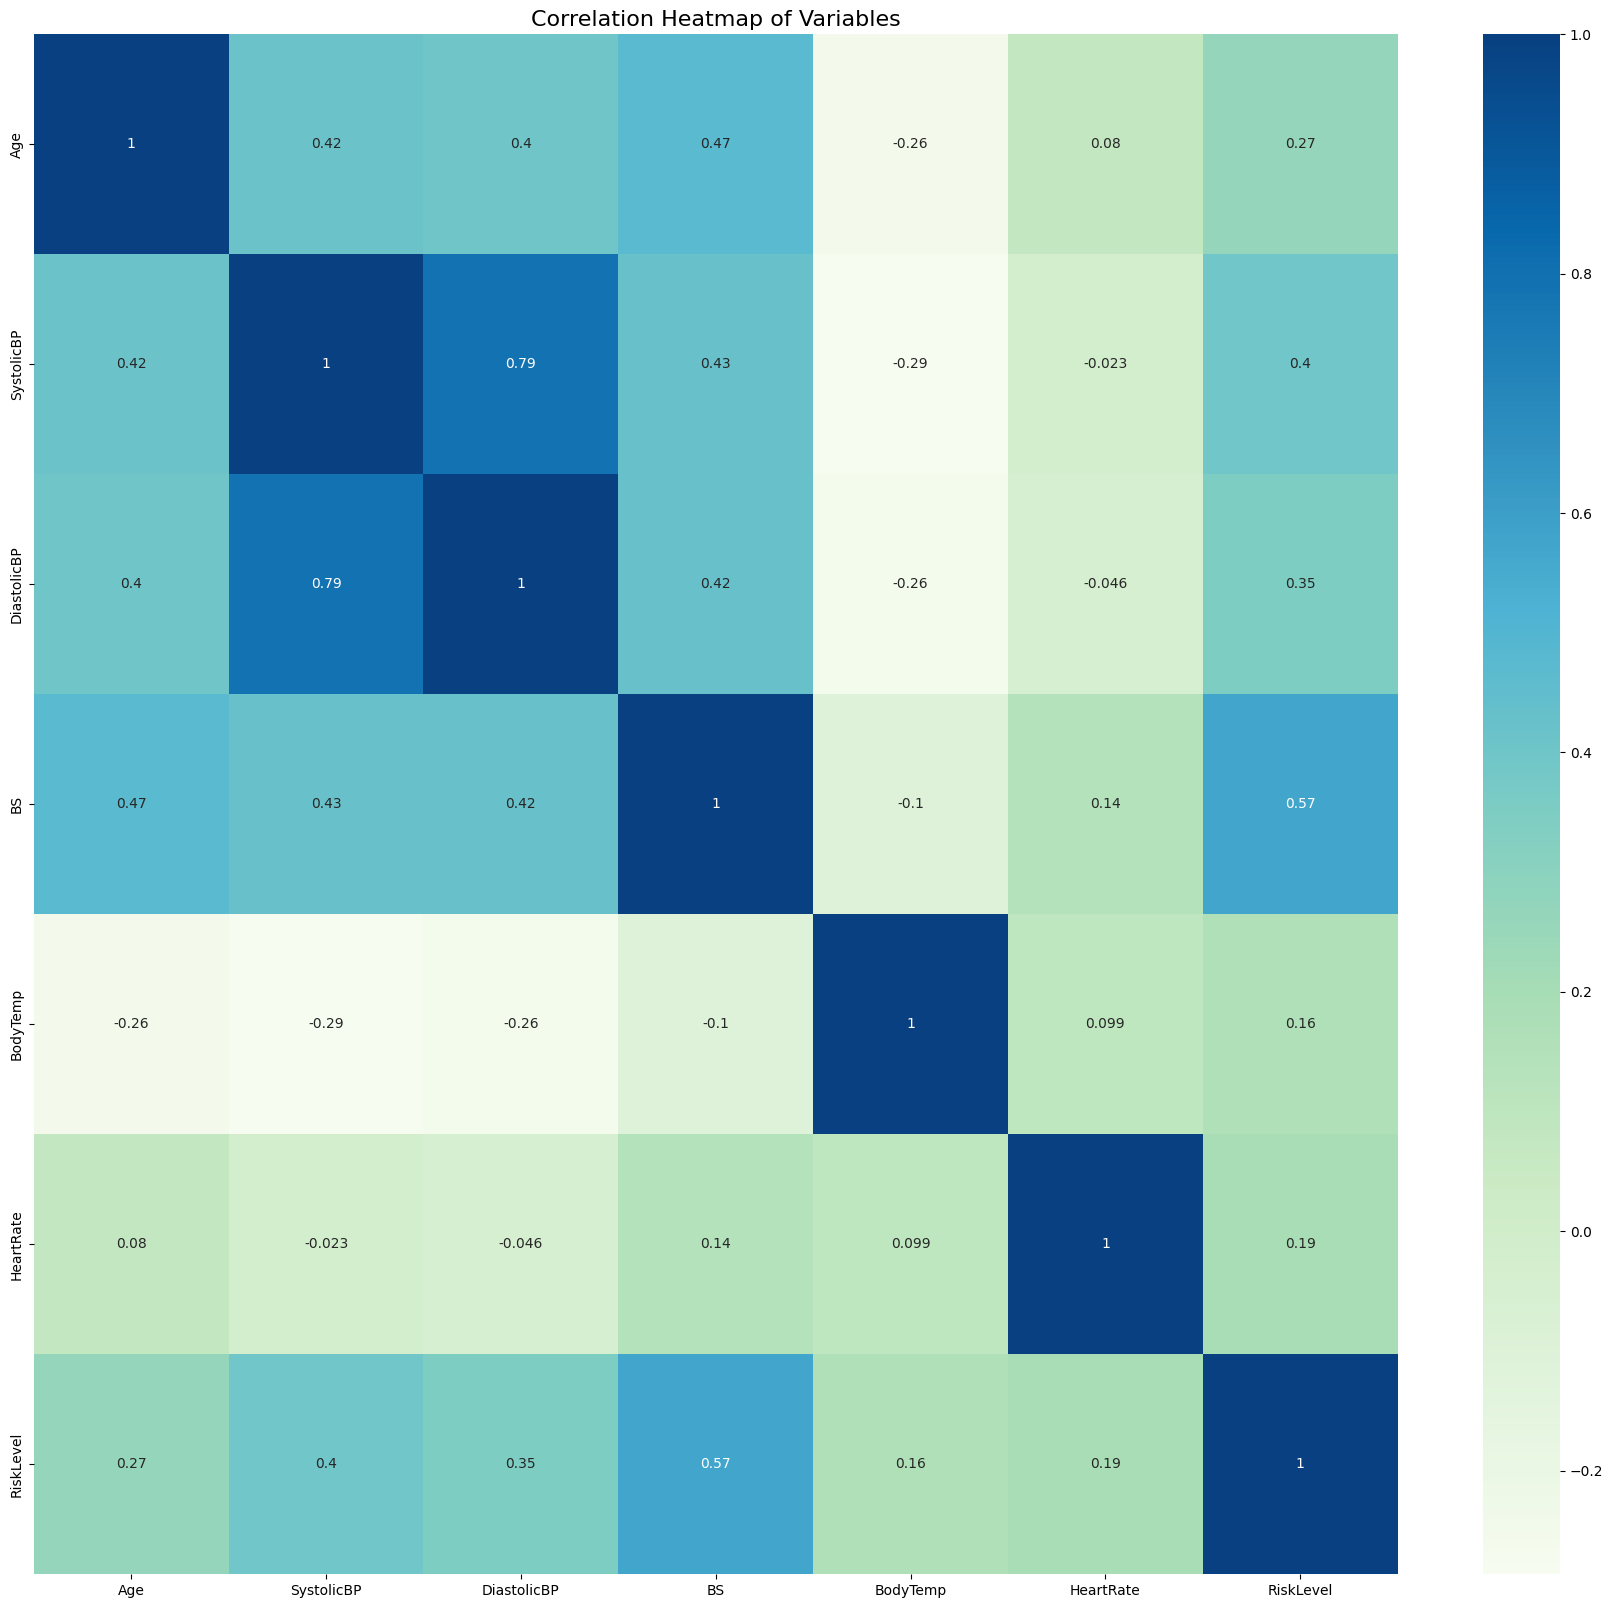

In [10]:
plt.figure(figsize=(22,20))  
sns.heatmap(df.corr(), annot=True, cmap = "GnBu")
plt.title("Correlation Heatmap of Variables", fontsize=16)
plt.show()

In [11]:
df = df.drop(["SystolicBP"], axis=1)

In [12]:
df.HeartRate.sort_values().head()

499      7
908      7
1000    60
1010    60
705     60
Name: HeartRate, dtype: int64

In [13]:
df = df.drop(df.index[df.HeartRate == 7])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1012 entries, 0 to 1013
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1012 non-null   int64  
 1   DiastolicBP  1012 non-null   int64  
 2   BS           1012 non-null   float64
 3   BodyTemp     1012 non-null   float64
 4   HeartRate    1012 non-null   int64  
 5   RiskLevel    1012 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 55.3 KB


In [15]:
columns = ["Age", "DiastolicBP", "BS", "BodyTemp", "HeartRate"]
scale_X = StandardScaler()
X = pd.DataFrame(scale_X.fit_transform(df.drop(["RiskLevel"],axis = 1)), columns = columns)
y = df["RiskLevel"]

In [16]:
X.head()

,Age,DiastolicBP,BS,BodyTemp,HeartRate
0,-0.363796,0.254566,1.903633,-0.485808,1.538308
1,0.378765,0.974379,1.296644,-0.485808,-0.589878
2,-0.066772,-0.465247,-0.220828,0.972192,0.740239
3,0.007484,0.614473,-0.524323,-0.485808,-0.589878
4,0.378765,-1.185059,-0.797468,-0.485808,0.208192


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((809, 5), (203, 5), (809,), (203,))

In [18]:
knn = KNeighborsClassifier(n_neighbors=10, p=2, weights="distance")
knn_mod = knn.fit(X_train,y_train)

In [19]:
pred_knn = knn_mod.predict(X_test)

In [20]:
mse_knn = mean_squared_error(y_test, pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, pred_knn))
acc = accuracy_score(pred_knn,y_test)

In [21]:
print("Mean Square Error for K_Nearest Neighbor  =", mse_knn)
print("Root Mean Square Error for K_Nearest Neighbor =", rmse_knn)
print("accuracy for knn model = ",acc)

Mean Square Error for K_Nearest Neighbor  = 0.2512315270935961
Root Mean Square Error for K_Nearest Neighbor = 0.5012300141587653
accuracy for knn model =  0.8374384236453202


In [22]:
print("Classification Report")
print(classification_report(y_test, pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_knn))

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        81
           1       0.77      0.85      0.81        67
           2       0.88      0.93      0.90        55

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.84       203
weighted avg       0.84      0.84      0.84       203

Confusion Matrix:
[[62 17  2]
 [ 5 57  5]
 [ 4  0 51]]


[Text(0, 0.5, 'Low'), Text(0, 1.5, 'Mid'), Text(0, 2.5, 'High')]

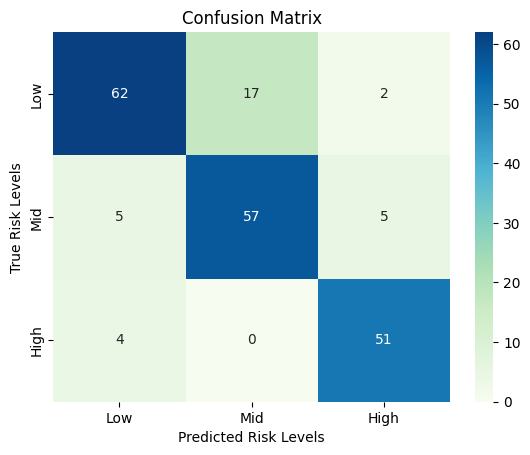

In [23]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_knn), annot=True, ax = ax, cmap = "GnBu")

ax.set_xlabel("Predicted Risk Levels")
ax.set_ylabel("True Risk Levels")
ax.set_title("Confusion Matrix") 
ax.xaxis.set_ticklabels(["Low", "Mid", "High"])
ax.yaxis.set_ticklabels(["Low", "Mid", "High"])

In [24]:
y_pred = knn_mod.predict([[1,2,78,56,76]])
print(y_pred)

[2]


C:\Users\nilay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [25]:
knn=KNeighborsClassifier(n_neighbors=10, p=2, weights="distance")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn.fit(X, y)
scores = cross_val_score(knn, X, y, cv = kf)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
y_pred = cross_val_predict(knn,X,y,cv=kf)
print(y_pred)

Cross Validation Scores:  [0.78817734 0.78325123 0.81683168 0.83168317 0.84653465]
Average CV Score:  0.8132956152758133
[2 2 2 ... 2 2 1]


In [26]:
random_forest = RandomForestClassifier(criterion="entropy", max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)
random_forest_mod = random_forest.fit(X_train, y_train)
pred_random_forest = random_forest_mod.predict(X_test)

mse_random_forest = mean_squared_error(y_test, pred_random_forest)
rmse_random_forest = np.sqrt(mean_squared_error(y_test, pred_random_forest))
acc = accuracy_score(pred_random_forest,y_test)

In [27]:
print("Mean Square Error for Random Forest = ",mse_random_forest)
print("Root Mean Square Error for Random Forest = ",rmse_random_forest)
print("accuracy of Random Forest Model = " ,acc)


Mean Square Error for Random Forest =  0.23645320197044334
Root Mean Square Error for Random Forest =  0.48626453908386463
accuracy of Random Forest Model =  0.8374384236453202


In [28]:
print("Classification Report")
print(classification_report(y_test, pred_random_forest))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_random_forest))

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        81
           1       0.79      0.79      0.79        67
           2       0.87      0.96      0.91        55

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.84       203
weighted avg       0.84      0.84      0.84       203

Confusion Matrix:
[[64 14  3]
 [ 9 53  5]
 [ 2  0 53]]


[Text(0, 0.5, 'Low'), Text(0, 1.5, 'Mid'), Text(0, 2.5, 'High')]

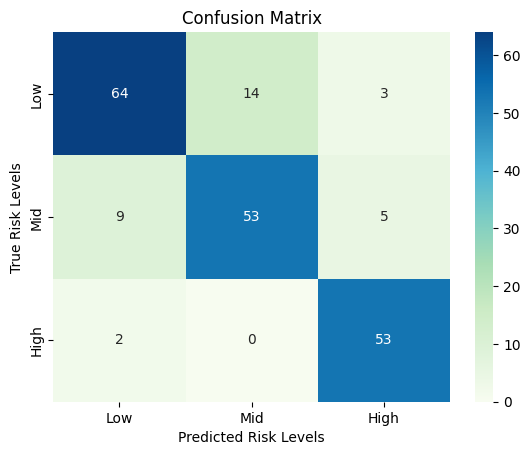

In [29]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_random_forest), annot=True, ax = ax, cmap = "GnBu")

ax.set_xlabel("Predicted Risk Levels")
ax.set_ylabel("True Risk Levels")
ax.set_title("Confusion Matrix") 
ax.xaxis.set_ticklabels(["Low", "Mid", "High"])
ax.yaxis.set_ticklabels(["Low", "Mid", "High"])

In [30]:
y_pred = random_forest_mod.predict([[1,2,78,56,76]])
print(y_pred)

[2]


C:\Users\nilay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [31]:
random_forest = RandomForestClassifier(criterion="entropy", max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
random_forest.fit(X, y)
scores = cross_val_score(random_forest, X, y, cv = kf)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
y_pred = cross_val_predict(random_forest,X,y,cv=kf)
print(y_pred)

Cross Validation Scores:  [0.8226601  0.85714286 0.81188119 0.85148515 0.86633663]
Average CV Score:  0.841901185192411
[2 2 2 ... 2 2 1]
